# CartPole

Exploring the `CartPole-v0` environment from the Open Gym 

## Import libraries and create an environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gym                                      # OpenAI Gym library
env = gym.make('CartPole-v1')                   # create an environment

## Show initial state

- On Windows, the render window will pop up on top of the browser only if it is not maximized to full screen (slightly **reduce the browser window**). 
- You can close the render window only by executing the command `env.close()`.

obs: [ 0.01960899  0.03754954  0.00264055 -0.03101713]


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Изменение режима для потока после его установки невозможно
  warnings.warn(str(err))


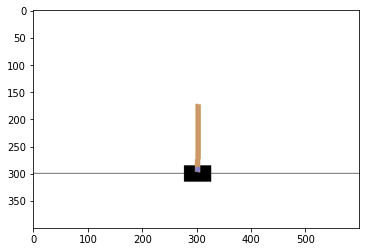

In [2]:
obs = env.reset()                               # initial observation on the system

print('obs:', obs) 
plt.imshow(env.render('rgb_array'))             # render the environment as image 

In [ ]:
env.close()                                       # сlose render window

## Environment properties

In [3]:
space = env.observation_space                     # observation space
print("space: ", space.shape, space.dtype)        # space dimension and type
print("low:   ", space.low)                       # minimum values
print("high:  ", space.high)                      # maximum values

actions = env.action_space                        # action space
print("actions:", actions.n, actions.dtype)       # number of actions, type

space:  (4,) float32
low:    [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
high:   [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
actions: 2 int64


In fact, the components of observation vary within much narrower limits (except for the coordinate):

In [22]:
stat = []
for episode in range(1000):
    s = env.reset()  
    stat.append(s)
    for _ in range(1000):
        a = int(s[3] > 0)  
        #a = env.action_space.sample()
        s,r,done,_ = env.step(a)
        stat.append(s)
        if done:
            break
stat = np.array(stat)
print("mean:", stat.mean(0))
print("std :", stat.std(0))

mean: [-0.02168871 -0.02043564 -0.00153303 -0.00068551]
std : [0.9111451  0.84331405 0.05745436 0.16886307]


## Reward Statistics

In [34]:
def policy(s):
    #return int( s[0]+s[1]+3*s[2]+s[3] > 0)       # best solution                 
    #return int(s[3] > 0)                         # rew = 198.4 [126...354] std = 41   
    return int(s[2] > 0)                          # rew =  42.2 [ 24... 72] std =  9

def run(ticks = 500):
    tot_rew = 0                                   # total reward    
    state = env.reset()                           # start state
    for t in range(1,ticks+1):       
        action = policy(state)                    # select action
        state, rew, done, _ = env.step(action)    # get inforamtion    
        tot_rew += rew         
        if done:                                  # end of episode
            break
            
    return tot_rew                                

def statistics(episodes = 1000, ticks = 500):
    rews = np.empty(episodes)                      # rewards in each episode 
    
    for episode in range(episodes):                
        rews[episode] = run()
        
    mean, std = rews.mean(), rews.std()            
    print(f"rew = {mean:.1f} ± {std/len(rews)**0.5 : .0f} [{rews.min():.0f}...{rews.max():.0f}] std = {std:.0f}")
    
    return mean, std                               

In [35]:
statistics(episodes=10000, ticks=500)

rew = 42.2 ±  0 [24...72] std = 9


(42.1813, 8.781721375106363)

## Save Video

In [39]:
from PIL import Image, ImageDraw, ImageFont
import imageio

def render_frame(frame, text: str):
    """
    Get frame with overwritten text:
    """
    im = Image.fromarray(frame)
    if text:        
        drawer = ImageDraw.Draw(im)    
        text_color = (255,255,255) if np.mean(im) < 128 else (0,0,0)
        font = ImageFont.truetype("verdana.ttf", 18)
        drawer.text((10, 10), text, fill=text_color, font=font)        
        font = ImageFont.truetype("verdana.ttf", 14)
        drawer.text((im.size[0]-100,im.size[1]-20), "QuData.com", fill=text_color, font=font)
    return im


frames, last = [], 0
for episode in range(1, 11):
    rew, wait = 0, 0
    s = env.reset()                        
    for t in range(1, 5001):       
        a = policy(s)                 
        s, r, done, _ = env.step(a) 
        rew += r
        
        if done:
            last = rew

        frame = env.render(mode='rgb_array') 
        frame = render_frame(frame, f"a=int(s[2]>0) Episode:{episode:2d}, t:{t:5d}, <reward>=42.2 [24... 72]")
        frames.append(frame)
    
        if done:    
            wait += 1
            if wait > 100:
                break                

imageio.mimwrite("render.mp4", frames, fps=60)            
env.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
